# Pengolahan Citra Digital FFT

Nama  = Nahari Ihsan

NIM   = 1306620056

Prodi = Fisika - B

Mata Kuliah = Pengolahan Citra Digital 

## IMPORT DAN FUNGSI

In [1]:
%matplotlib inline
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from scipy import stats
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
from scipy import fftpack

## Nomor 1

In [14]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [16]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

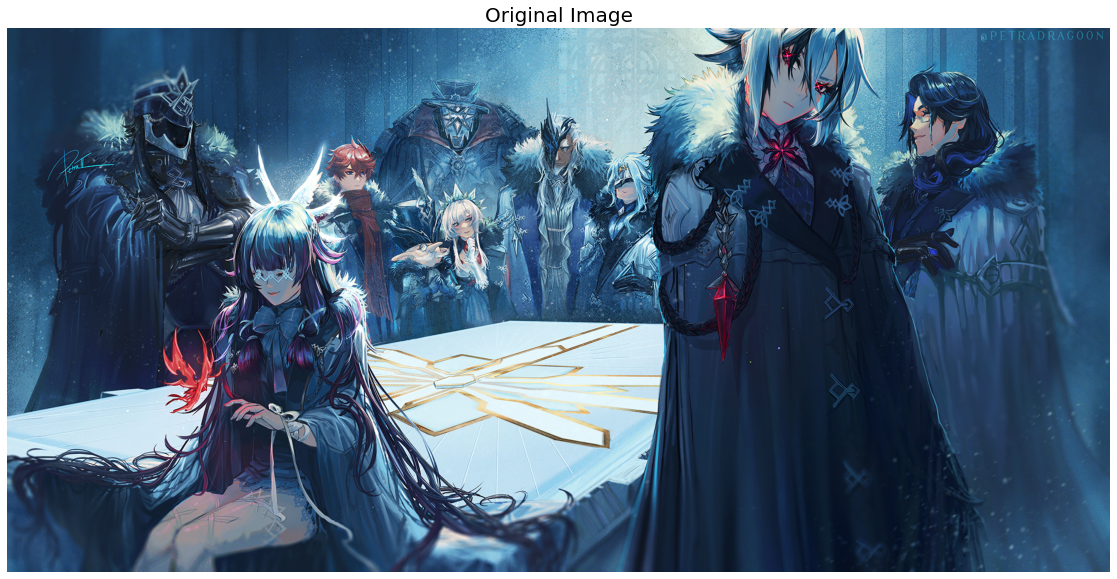

In [19]:
im = Image.open("Fathui.png")
pylab.figure(figsize=(20,10))
plot_image(im, 'Original Image')

## Nomor 2

In [21]:
import numpy.fft as fp
im1 = rgb2gray(imread('Fathui.png'))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
print('FFT\n', freq1)
print('')
print('Inverse FFT\n', im1_)

FFT
 [[ 681518.79279059    +0.j         -126312.91371797-61986.73107903j
   100037.75119396+22818.15205114j ...  -46640.54933068 -3153.84018467j
   100037.75119396-22818.15205114j -126312.91371797+61986.73107903j]
 [  14330.80751547+13894.58611008j   46751.32961011+25661.21128369j
   -13696.64499818+29538.30237863j ...  -43133.05379281-13579.31659172j
   -14594.86136595+84095.39888681j  -36808.84086358-40286.16014293j]
 [ -47007.01207428-62667.26511639j   42180.11955973+66127.75041075j
   -29659.80443324-10105.39344883j ...   21727.79684937 -9558.53393024j
    -6836.18924898-33231.85892409j  -27218.42871795 +8370.92712122j]
 ...
 [  18079.71339692+39993.97763962j  -13664.69925494-17936.68241013j
    20087.41070576+18081.38211816j ...  -15124.39685466  +941.68241112j
   -13469.57958558+12971.35260983j   10260.72620892+14616.99578447j]
 [ -47007.01207428+62667.26511639j  -27218.42871795 -8370.92712122j
    -6836.18924898+33231.85892409j ...     997.57202812-21994.446803j
   -29659.804433

## Nomor 3

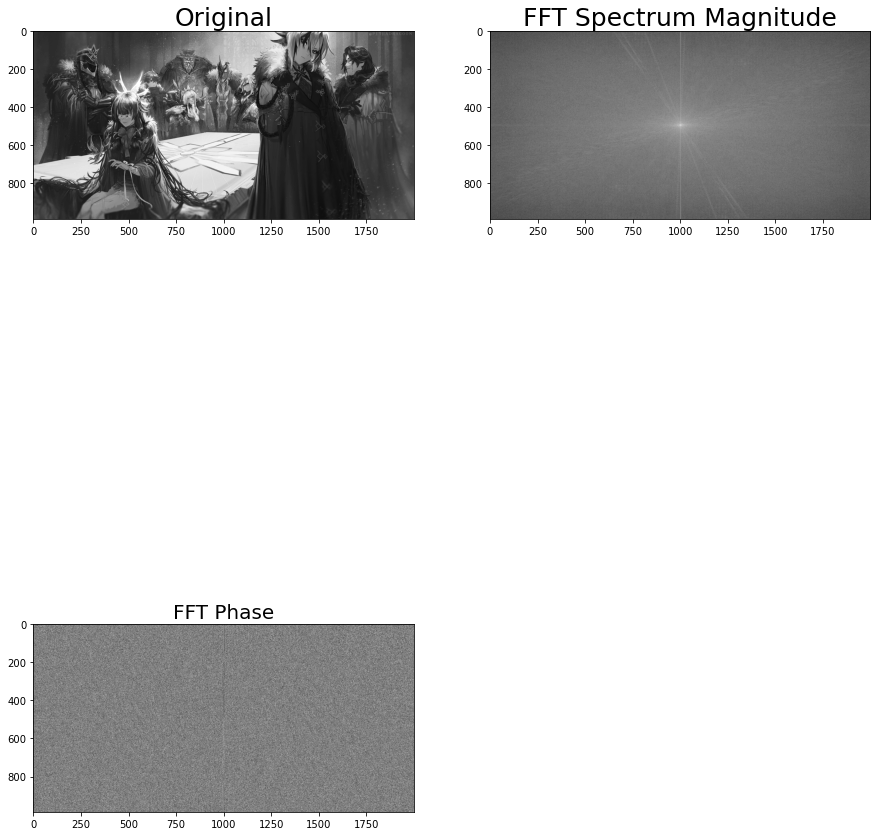

In [25]:
pylab.figure(figsize=(15,20))
pylab.subplot(2,2,1), pylab.imshow(im1, cmap='gray'), pylab.title('Original', size=25)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=25)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.show()

## Nomor 4

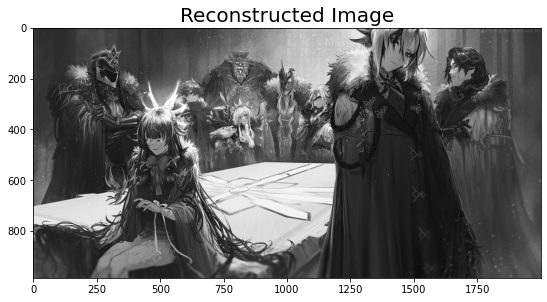

In [26]:
pylab.figure(figsize=(20,30))
pylab.subplot(2,2,4), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

## Nomor 5

### THRESHOLDING WITH GAUSSIAN

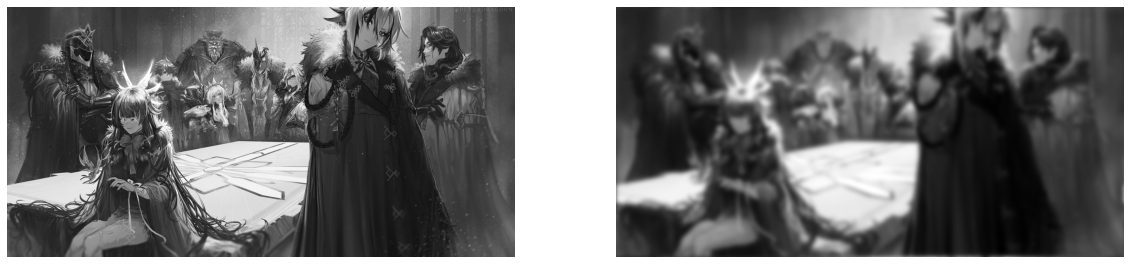

In [27]:
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray()
im = np.mean(imread('Fathui.png'), axis=2)
axes1.imshow(im)
axes1.axis('off')
freq = fp.fft2(im)
for i in range(1,10):
    freq_gaussian = ndimage.fourier_gaussian(freq, sigma=i)
    im1 = fp.ifft2(freq_gaussian)
    axes2.imshow(im1.real)
    axes2.axis('off')
pylab.show()

### THRESHOLDING MANUAL

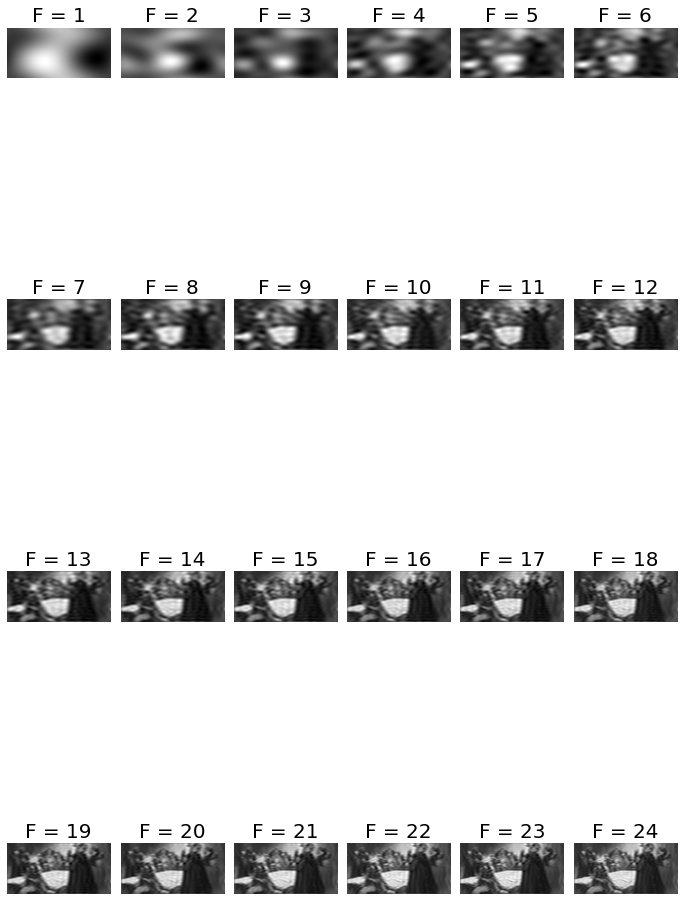

In [29]:
im = np.array(Image.open('Fathui.png').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low
    im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(4,6,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

In [30]:
def syarat_threshold(freq1,threshold):
    array = freq1.copy()
    for y in range(len(array)):
        for x in range(len(array[y])):
            if array[y][x] < threshold:
                array[y][x] = 0
    return array

In [31]:
def plot_threshold(freq1,threshold):
    pylab.figure(figsize=(20,15))
    thresholding = 1
    for i in range(1,11):
        fft_threshold_copy = freq1.copy()
        fft_thresholding = syarat_threshold(fft_threshold_copy,threshold)
        ifft = fp.ifft2(fft_thresholding).real
        image_ifft = np.clip(ifft,0,255)
        pylab.subplot(2,5,i)
        pylab.imshow(image_ifft, cmap=pylab.cm.gray)
        pylab.title('Threshold = '+str(round(threshold)), size = 15)
        thresholding += 1
        threshold *= thresholding
    return

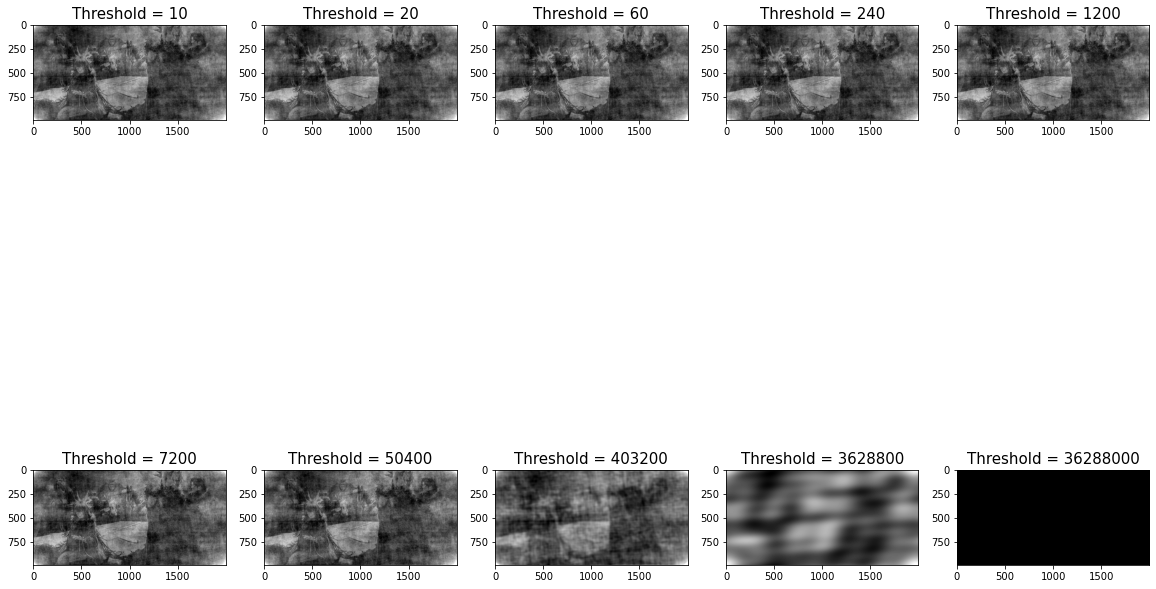

In [32]:
plot_threshold(freq1,10)